In [64]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras import Sequential
from keras.src.layers import Dense
from keras.src.optimizers import Adam
import plotly.graph_objects as go
from sklearn.metrics import mean_absolute_error

In [24]:
N = 3000
X = np.random.random((N, 2)) * 6 - 3
Y = np.cos(2 * X[:, 0]) + np.cos(3 * X[:, 1])

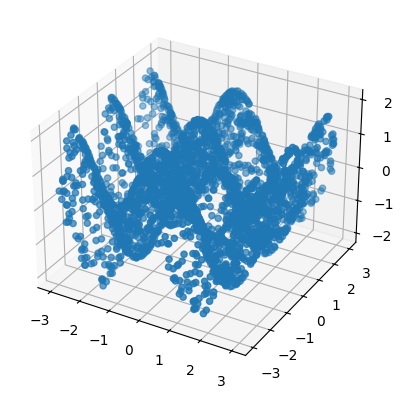

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], Y)
plt.show()

In [52]:
model = Sequential()
model.add(Dense(units=128, input_shape=(2,), activation="relu"))
model.add(Dense(units=1))

In [53]:
optimizer = Adam(0.01)

model.compile(loss='mse', optimizer=optimizer, metrics=["mae"])

history = model.fit(X, Y, epochs=100)

Epoch 1/100
94/94 [==============================] - 1s 3ms/step - loss: 0.9410 - mae: 0.7831
Epoch 2/100
94/94 [==============================] - 0s 3ms/step - loss: 0.8193 - mae: 0.7356
Epoch 3/100
94/94 [==============================] - 0s 3ms/step - loss: 0.6569 - mae: 0.6777
Epoch 4/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5580 - mae: 0.6442
Epoch 5/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5438 - mae: 0.6333
Epoch 6/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5161 - mae: 0.6202
Epoch 7/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5020 - mae: 0.6187
Epoch 8/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4548 - mae: 0.5945
Epoch 9/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4243 - mae: 0.5697
Epoch 10/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4213 - mae: 0.5600
Epoch 11/100
94/94 [==============================] - 0s 3m

In [54]:
def draw_history(history):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=history.epoch, y=history.history["mae"], name="mae"))
    fig.show()

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=history.epoch, y=history.history["loss"], name="loss"))
    fig.show()


draw_history(history)

In [70]:
preds = model.predict(X, verbose=0)

df = pd.DataFrame({
    "true": Y,
    "pred": preds.ravel()
})

print(f"Mean absolute error: {mean_absolute_error(df.true, df.pred)}")

Mean absolute error: 0.05979732315498588
